<a href="https://colab.research.google.com/github/dskyshr/cadaSimulator/blob/main/CADA_simulation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

def print_result_to_csv()


Main block

In [77]:
# Import modules required
import random
from itertools import product
import itertools
import copy
from progressbar import ProgressBar
from collections import defaultdict, deque

# For I/O to CSV
import csv
import os
import pandas as pd

# Load my modules
%run '/content/drive/MyDrive/Colab Notebooks/my_module.ipynb'

# Debug mode
debug = False

# Required parameters
num_school = 10
num_capacity = 10
num_student = num_school * num_capacity
alpha = 0.5

# Optional parameters
randomize_acceptable = True
randomize_order = False
normalize_utils = True

# Number of attemption
num_attempt = 10

# Variables for the aggregation
cac_cada  = 0 # Number of CAC by CADA
cr_cada   = 0 # Consumption rate by CADA
cac_damtb = 0 # Number of CAC by DA-MTB
cr_damtb  = 0 # Consumption rate by DA-STB
cac_dastb = 0 # Number of CAC by DA-MTB
cr_dastb  = 0 # Consumption rate by DA-S\\TB

file_path = f"/content/drive/MyDrive/Colab Notebooks/Eq_result_{num_school}_schools_{num_capacity}_capacities_05_alpha_20260101.csv"

progress = ProgressBar(maxval = num_attempt)
for n in range(num_attempt):

    # CADA #################################################

    # Create arbitrary preferences
    pref_odnl, pref_cdnl = create_preference_table()
    pref_odnl_bk = copy.deepcopy(pref_odnl) # Use deepcopy
    print(f"{pref_odnl}")

    # Find cada equilibrium
    eq, eq_eu = find_cada_equilibrium_by_BRD()
    print_eq_to_csv() # Additional verification

    # Create all schools' priority associated to CADA equilibrium
    g = create_CADA_priority() # If CADA tie-breaks by DA-MTB, use "create_CADA_priority_by_damtb()"

    # Implement DA mechanism
    match = implement_DA()

    # Calculate cac, consumption rate, ex-ante welfair
    cac, cr = judge_CAC()
    cac_cada += cac
    cr_cada  += cr
    #welfair = get_exante_welfair(eq_eu)

    # DA-MTB #################################################

    # Create arbitrary preferences
    pref_odnl = pref_odnl_bk # Restore
    pref_odnl_bk = copy.deepcopy(pref_odnl) # Use deepcopy

    competitors = get_competitors()

    # Culcurate expected utility of all students for DA-MTB
    # Unnecessary if welfair isn't needed.
    #eu = culcurate_expected_utilities()

    # Create all schools' priority
    g = create_random_priority()

    # Implement DA mechanism
    match = implement_DA()

    # Calculate cac, consumption rate, ex-ante welfair
    cac, cr = judge_CAC()
    cac_damtb += cac
    cr_damtb  += cr

    # DA-STB #################################################

    # Create arbitrary preferences
    pref_odnl = pref_odnl_bk # Restore
    competitors = get_competitors()

    # Create all schools' priority
    g = create_random_priority_by_STB()

    # Implement DA mechanism
    match = implement_DA()

    # Calculate cac, consumption rate, ex-ante welfair
    cac, cr = judge_CAC()
    cac_dastb += cac
    cr_dastb  += cr

    progress.update(n+1)
progress.finish()

avg_cr_cada = cr_cada / num_attempt
avg_cr_damtb = cr_damtb / num_attempt
avg_cr_dastb = cr_dastb / num_attempt

print(f'Mean of cr_cada  : {avg_cr_cada}')
print(f'Mean of cr_damtb : {avg_cr_damtb}')
print(f'Mean of cr_dastb : {avg_cr_dastb}')

gap_cada_damtb = avg_cr_cada - avg_cr_damtb
gap_cada_dastb = avg_cr_cada - avg_cr_dastb

# CSV will be saved in "/content" directory as default.
#file_path = f"/content/drive/MyDrive/Colab Notebooks/Result_{num_school}_schools_05_alpha_20260101.csv"
#print_result_to_csv()


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4], [0], [0], [0, 1], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5], [0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1], [0], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1], [0], [0, 1, 2, 3, 4], [0], [0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 

  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Created new file and wrote header to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3], [0, 1], [0, 1], [0, 1], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [0, 1], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4]

 20% (2 of 10) |#####                    | Elapsed Time: 1:38:49 ETA:   6:35:18

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1, 2], [0], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1], [0, 1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1

 30% (3 of 10) |#######                  | Elapsed Time: 3:07:43 ETA:   7:18:00

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3], [0], [0], [0, 1, 2], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4], [0], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8

 40% (4 of 10) |##########               | Elapsed Time: 4:38:57 ETA:   6:58:26

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2], [0], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1], [0], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2], [0, 1], [0, 1, 2, 3, 4], [0], [0, 1, 2], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6],

 50% (5 of 10) |############             | Elapsed Time: 5:32:01 ETA:   5:32:01

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0], [0, 1, 2], [0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4], [0], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0], [0, 1, 2, 3], [0, 1, 2], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1,

 60% (6 of 10) |###############          | Elapsed Time: 6:27:43 ETA:   4:18:28

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [0], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1], [0, 1, 2, 3], [0, 1], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 

 70% (7 of 10) |#################        | Elapsed Time: 8:19:03 ETA:   3:33:52

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5], [0], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6], [0, 

 80% (8 of 10) |####################     | Elapsed Time: 9:52:09 ETA:   2:28:02

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1], [0, 1], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1], [0, 1, 2, 3, 4, 

 90% (9 of 10) |#####################   | Elapsed Time: 11:50:30 ETA:   1:18:56

Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
[[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5], [0], [0], [0, 1, 2, 3], [0, 1, 2, 3, 4, 5], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3], [0, 1, 2], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6], [0, 1], [0, 1], [0, 1, 2, 3, 4], [0, 1, 2

100% (10 of 10) |#######################| Elapsed Time: 14:13:46 Time: 14:13:46


Appended data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Finished attempting to write data to /content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv
Mean of cr_cada  : 0.6639999999999999
Mean of cr_damtb : 0.6709999999999999
Mean of cr_dastb : 0.6589999999999999


In [7]:
show_csv_contents(file_path)

NameError: name 'show_csv_contents' is not defined

In [ ]:
download_csv(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Attempting to download './drive/MyDrive/Colab Notebooks/Result_5_schools_03_alpha_non_norm.csv'...


In [50]:
#delete_csv(file_path)

File '/content/drive/MyDrive/Colab Notebooks/Eq_result_5_schools_05_alpha_20260101.csv' does not exist.


Plot

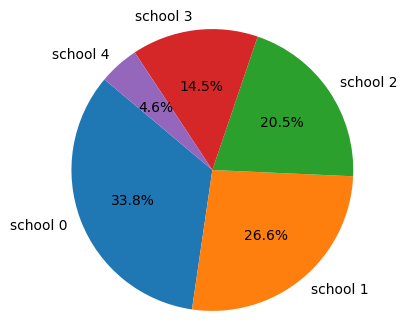

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#file_path = '/content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_1_capacities_05_alpha_20260101.csv'
file_path = '/content/drive/MyDrive/Colab Notebooks/Eq_result_10_schools_10_capacities_05_alpha_20260101.csv'

df_results = pd.read_csv(file_path)

school_assignment_columns = [col for col in df_results.columns if 'school' in col and col.replace('school ', '').isdigit()]
school_assignment_counts = df_results[school_assignment_columns].sum()

# Filter out schools with zero assignments for better visualization
assignments_to_plot = school_assignment_counts[school_assignment_counts > 0]

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    assignments_to_plot,
    labels=assignments_to_plot.index,
    autopct='%1.1f%%',
    startangle=140
)
#plt.title('Distribution of Targeting (5 schools, 1 capacity)', y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

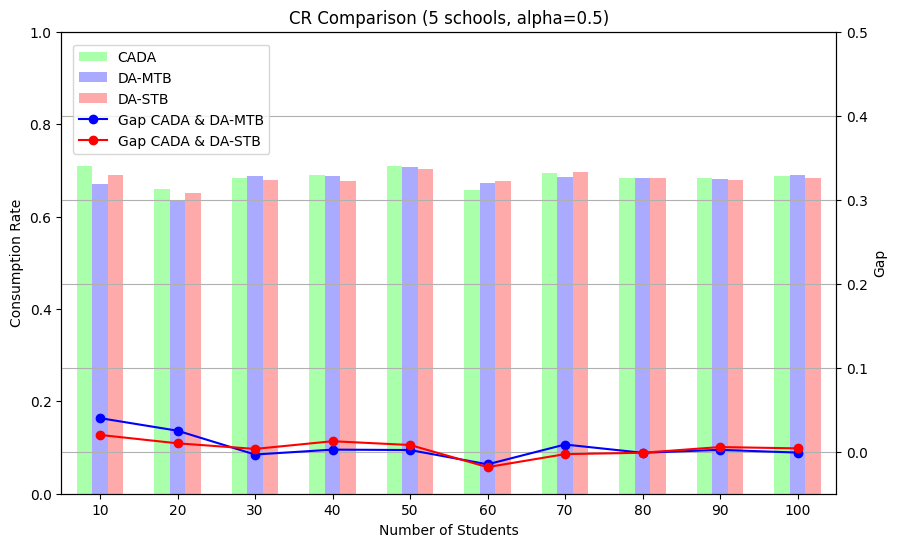

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

title = f'Title here.'
try:
    df = pd.read_csv(file_path)

    # Create figure and primary axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Create secondary axes
    ax2 = ax1.twinx()

    # Plot bars on primary axes
    bar_width = 2 # Adjust bar width as needed
    #bar_width = 0.02 # Adjust bar width as needed

    x_pos = df['num_student']
    #x_pos = df['alpha']
    ax1.bar(x_pos - bar_width, df['avg_cr_cada'], bar_width, label='CADA', color='#aaffaa')
    ax1.bar(x_pos, df['avg_cr_damtb'], bar_width, label='DA-MTB', color='#aaaaff')
    ax1.bar(x_pos + bar_width, df['avg_cr_dastb'], bar_width, label='DA-STB', color='#ffaaaa')

    # Plot line on secondary axes
    ax2.plot(df['num_student'], df['gap_cada_damtb'], label='Gap CADA & DA-MTB', color='blue', marker='o')
    ax2.plot(df['num_student'], df['gap_cada_dastb'], label='Gap CADA & DA-STB', color='red', marker='o')
    #ax2.plot(df['alpha'], df['gap_cada_damtb'], label='Gap CADA & DA-MTB', color='blue', marker='o')
    #ax2.plot(df['alpha'], df['gap_cada_dastb'], label='Gap CADA & DA-STB', color='red', marker='o')

    # Add labels and title
    ax1.set_xlabel('Number of Students')
    #ax1.set_xlabel('alpha')

    ax1.set_ylabel('Consumption Rate')
    ax2.set_ylabel('Gap')
    plt.title(title)

    # Set y-axis limits
    ax1.set_ylim([0.0, 1.0])
    ax2.set_ylim([-0.05, 0.5]) # Adjust the upper limit for cr_gap based on your expected data range

    # Set x-axis limits and ticks
    ax1.set_xlim([5, 105]) # 5-10 schools
    #ax1.set_xlim([10, 110]) # 15 schools
    #ax1.set_xlim([-0.05, 0.95])

    ax1.set_xticks(np.arange(10, 110, 10)) # 5-10 schools
    #ax1.set_xticks(np.arange(10, 115, 5)) # 15 schools
    #ax1.set_xticks(np.arange(0.0, 1.0, 0.1)) # Set ticks every 10 units from 10 to 100

    # Add legends
    fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.87))

    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"File '{file_path}' was not found.")
except Exception as e:
    print(f"A error has occured while reading or rendering: {e}")